In [60]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")


In [3]:
# Explore the few first rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# List the columns
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
# Set costumer Id as index so it not be a feature
df.set_index("customerID" , inplace = True)


In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
# Shape of the data set
df.shape

(7043, 20)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [64]:
# Data Cleaning

# Replace empty strings with Nan
# Total charges is object so probably it contains empty strings

df['TotalCharges'] = df['TotalCharges'].replace(' ',pd.NA)

In [65]:
# Convert from object to numeric
# errors='coerce'
# Tells pandas:
# If a value cannot be converted to a number (for example "abc" or empty space " "),
# Instead of raising an error, replace it with NaN (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [66]:
df.isna().sum()
# same as df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [67]:
# drop the nan values
df.dropna(subset='TotalCharges',axis=0,inplace=True)

In [22]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
# Check duplicated entries
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [26]:
df.index.duplicated().sum()

0

In [61]:
# Convert the churn col into numeric : yes=1 no=0
# strip to remove white spaces
df['Churn'] = df['Churn'].str.strip().map({'Yes':1 , 'No':0})

In [28]:
df.head

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [29]:
# Exploratory Data Analysis EDA

In [31]:
# Stistical summary of nuùeric features

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [32]:
# summary for non numeric cols
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [33]:
# Check either the data set is balanced or inbalanced
# Check class distribution for target variable
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [34]:
df['Churn'].value_counts(normalize=True) *100
# we see the data is imbalanced 73% 26%

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [36]:
# This imbalance is important to concider because ml models can be biased 
# to the majority class
# So to resolve this we may apply techniques like :
# stratified sampling , SMOTE , undersampling , class weight during model train

In [37]:
# Visualize Categorical features vs Churn


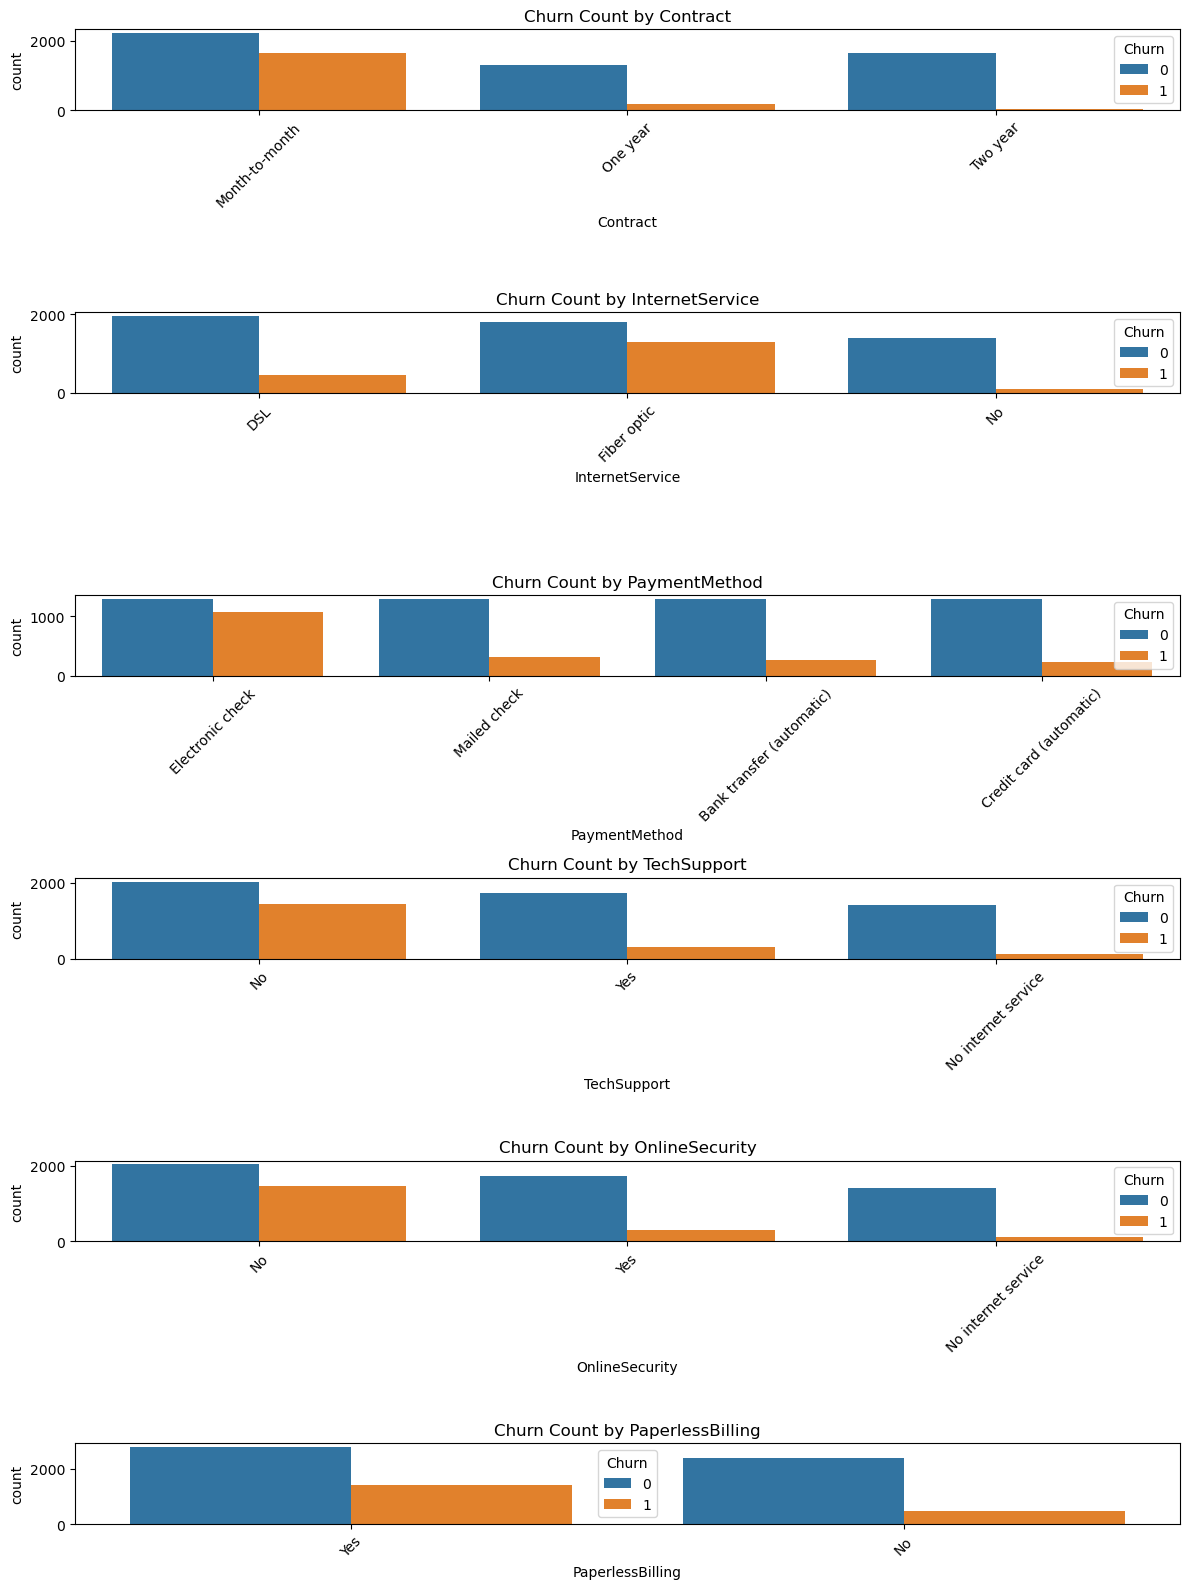

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12,16))

usefull_cat_features = ['Contract' , 'InternetService' ,'PaymentMethod',
                        'TechSupport' , 'OnlineSecurity' , 
                        'PaperlessBilling']

for i, col in enumerate(usefull_cat_features ,1):
    plt.subplot(len(usefull_cat_features) , 1,i)
    sns.countplot(data=df , x=col,hue='Churn')
    plt.title(f'Churn Count by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()
    

In [41]:
# BoxPlots or violin plots to compare Monthly Charges TotalCgarges tenure by churn status

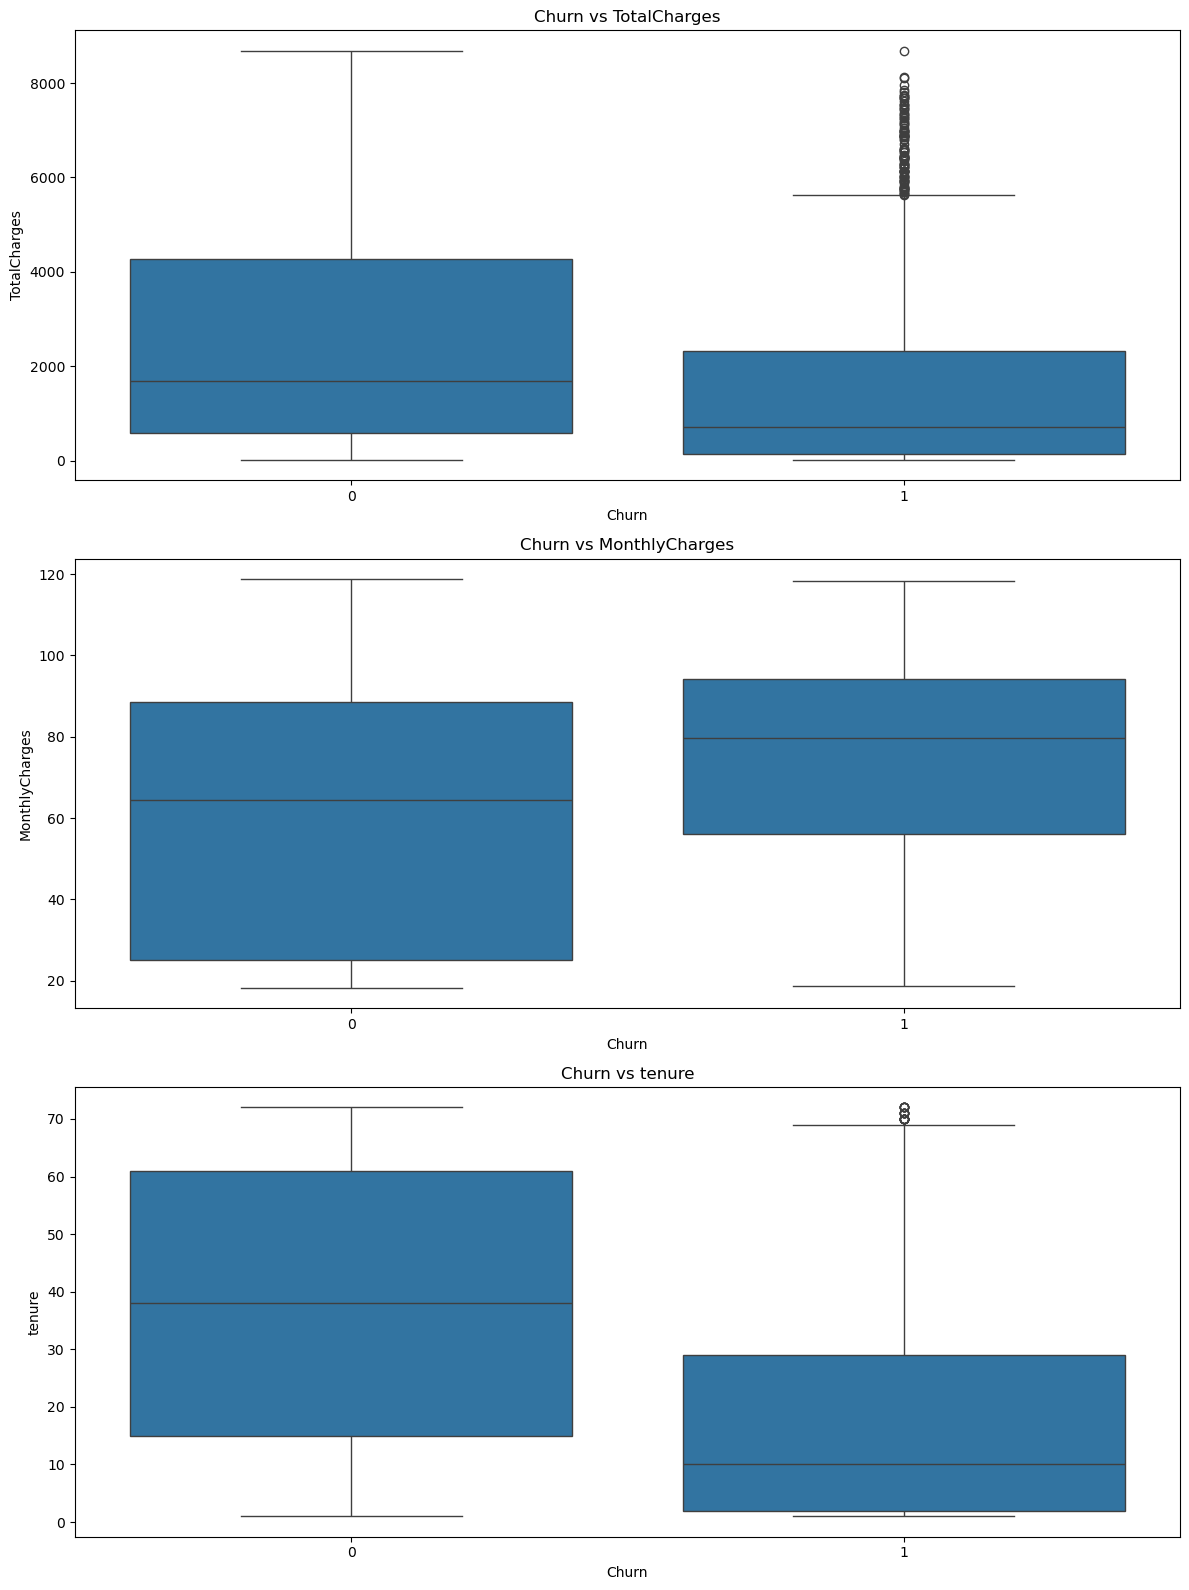

In [42]:
num_features = ['TotalCharges','MonthlyCharges','tenure']
plt.figure(figsize=(12,16))

for i, col in enumerate(num_features , 1):
    plt.subplot(len(num_features) ,1,i)
    sns.boxplot(data=df , x='Churn' , y=col)
    plt.title(f'Churn vs {col}')
    plt.tight_layout()
    
plt.show()

In [43]:
# Short tenure are likely to shurn 
# (the line is the median)
# High monthly charges are likely to churn
# (circles are outliers )
# like in Total charges there is many outliers

In [44]:
# Correlation Heatmap (for numeric features)
# Identifying multicollinearity or strong numeric pattterns


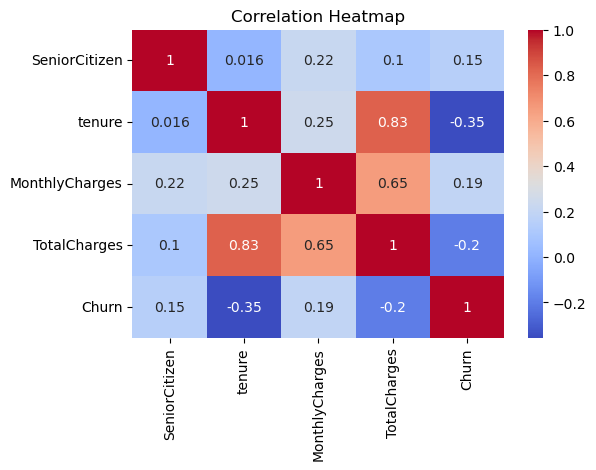

In [45]:
# Select only numeric
df_numeric = df.select_dtypes(include=['number'])

#Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Data Preprocessing


In [47]:
# Get only object type columns (categorical)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols 

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [48]:
# Separate binary and multi-class features
binary_features = [col for col in cat_cols if df[col].nunique() == 2]

multi_class_features = [col for col in cat_cols if df[col].nunique() > 2]

In [49]:
binary_features

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [50]:
multi_class_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [52]:
# A more foramt way

summary = pd.DataFrame({
    "Features" : cat_cols ,
    "Unique_values" : [df[col].nunique() for col in cat_cols] ,
    "Type" : ["Binary" if df[col].nunique() == 2 else "Multi-class" for col in cat_cols]
})

summary.sort_values(by="Unique_values")

,Features,Unique_values,Type
0,gender,2,Binary
1,Partner,2,Binary
2,Dependents,2,Binary
3,PhoneService,2,Binary
13,PaperlessBilling,2,Binary
4,MultipleLines,3,Multi-class
5,InternetService,3,Multi-class
6,OnlineSecurity,3,Multi-class
7,OnlineBackup,3,Multi-class
8,DeviceProtection,3,Multi-class


In [53]:
# Encoding categorical fatures


In [68]:
# Label encoding for binary class
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in binary_features :
    df[col] = le.fit_transform(df[col])

In [55]:
df[binary_features].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,
7590-VHVEG,0,1,0,0,1
5575-GNVDE,1,0,0,1,0
3668-QPYBK,1,0,0,1,1
7795-CFOCW,1,0,0,0,0
9237-HQITU,0,0,0,1,1


In [69]:
# One Hot encoding for multiclass features
#pd.get_dummies() is a pandas function that does one-hot encoding for you automatically.

#if we know in example for a feature of 3 categories
# we know 2 of those categories either 0 or 1
# we can deduce the third one : this is called multi colenearity
# multicolenearity occurs when we do one hot encoding so there is multiple 
# realted features , this can confuse linear models like linear regression
# to resolve this we can drop one category from each feature by using : 
# drop_first=True

df = pd.get_dummies(df , columns=multi_class_features , drop_first=True)

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [71]:
# We should now convert from boolean cols to numeric cols 0/1
# Identify bool cols
bool_cols = df.select_dtypes(include=["bool"]).columns

# Convert to int
df[bool_cols] = df[bool_cols].astype('int')

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# Feature Scaling


In [75]:
# Scaling numerical features like tenure,charges to ensure coonsistent value range

from  sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['tenure' , 'TotalCharges' , 'MonthlyCharges']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [76]:
df[numeric_cols]

,tenure,TotalCharges,MonthlyCharges
0,-1.280248,-0.994194,-1.161694
1,0.064303,-0.173740,-0.260878
2,-1.239504,-0.959649,-0.363923
3,0.512486,-0.195248,-0.747850
4,-1.239504,-0.940457,0.196178
...,...,...,...
7038,-0.343137,-0.129180,0.664868
7039,1.612573,2.241056,1.276493
7040,-0.872808,-0.854514,-1.170004
7041,-1.158016,-0.872095,0.319168


In [77]:
# Separate features and target variables


In [83]:
df.set_index('customerID' , inplace=True)

In [84]:
y = df["Churn"]
X = df.drop('Churn' , axis=1)

In [85]:
# Split into train test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [86]:
# Since our dataset is imbalanced 73% no 27% yes
# it's important to balance it to ensure model not become biased toward majority class

# SMOTE is a smart way to fix imbalanced datasets by creating synthetic minority-class examples.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train , y_train)

In [87]:
y_train_resampled.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [89]:
# Build ML Model pipeline

In [91]:
# First, install the xgboost package
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 9.6 MB/s eta 0:00:06
   -- ------------------------------------- 3.7/56.8 MB 11.5 MB/s eta 0:00:05
   ---- ----------------------------------- 6.3/56.8 MB 11.4 MB/s eta 0:00:05
   ------ --------------------------------- 8.7/56.8 MB 11.7 MB/s eta 0:00:05
   ------- -------------------------------- 11.0/56.8 MB 11.7 MB/s eta 0:00:04
   --------- ------------------------------ 13.4/56.8 MB 11.7 MB/s eta 0:00:04
   ----------- ---------------------------- 15.7/56.8 MB 11.6 MB/s eta 0:00:04
   ------------ --------------------------- 18.1/56.8 MB 11.6 MB/s eta 0:00:04
   ------------- -------------------------- 19.4/56.8 MB 11.1 MB/s eta 0:00:04
   -------------- ------------------------- 21.2/56.8 MB 10.8 MB/s eta 0:00:04
   ---------------- ----------------------- 23.6/56.8 MB 10.9 MB/s eta 0:00:04
   ------------------ --------------------- 26.0/56.8 MB 11.0 MB/s

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report



In [96]:
# Models to compare
models= {
    'Logistic Regression' : LogisticRegression(solver='liblinear',random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(eval_metrics='logloss',random_state=42),
}

In [98]:
# Pipeline is like a “recipe” that connects steps in order.
for name , model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the pipeline
    # fit() means “train the pipeline”.
    # First, it scales the training data with StandardScaler.
    # Then, it sends the scaled data to the model to learn from it.
    
    pipe.fit(X_train_resampled , y_train_resampled)
    
    y_pred = pipe.predict(X_test)
    
    print(f'Model : {name}')
    
    print(classification_report(y_test , y_pred))

Model : Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1033
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407

Model : Random Forest
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.55      0.62      0.58       374

    accuracy                           0.77      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.77      0.77      1407

Model : XGBoost
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1033
           1       0.50      0.64      0.56       374

    accuracy                           0.73      1407
   macro avg       0.68      0.70      0.68      1407
weighted

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
